## Boston AirBNB Data Set

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. [1]

Airbnb is used by millions of host and travelers to list their space and book accommodations anywhere in the world.

The Boston AirBNB data set was downloaded from Inside Airbnb site which is an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world.

By analyzing publicly available information about a city's Airbnb's listings, Inside Airbnb provides filters and key metrics so you can see how Airbnb is being used to compete with the residential housing market. [2]

[1] Airbnb, (2021, July 20). In Wikipedia. https://en.wikipedia.org/wiki/Airbnb

[2] Inside Airbnb. Adding data to the debate. (2021, July 21). Inside Airbnb. http://insideairbnb.com/about.html


This analysis will follow the Cross-Industry Standard Process for Data Mining (CRISP-DM) methodology, so after talking about what AirBnb is and what is its business model I will continue with the steps needed to understand the data, prepare it, deal with missing data and transform categorical variables when needed in order to answer the following questions and also create a model to predict the price of a listing.

<mark>The aim of the below data analysis is to understand the following:</mark>

1. How is price impacting the occupancy of Apartments during the year?
1. Is the price the only factor to choose one apartment between the other?  
1. Do the physical location of the property has an impact on the occupancy of the property?
1. What makes an Aparment more busy that others?


### Blog post

https://medium.com/@ortizjuan2/my-take-on-the-boston-airbnb-data-using-crisp-dm-65bd53356acb

## Data Understanding

The Boston Airbnb data set consist of three different comma separated value files:
- listings.csv, including full descriptions and average review score
- calendar.csv, including listing id and the price and availability for that day
- reviews.csv, including unique id for each reviewer and detailed comments

This analysis will use only the first two files, listings and calendar.

The following cells will read, explore and prepare the data for the analysis. I will ensure the correct data types for the date and price columns and identify if is there null values that require attention.
In summary for each data set the following steps will be completed:

1. Read the data
1. Check total number of rows and columns
1. Check data types and ensure date and price are correct
1. Check for null values and take a descision to deal with them

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
import numpy as np
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 200

<h3 style='color:#00fe0f;'>Calendar data set</h3>

In [2]:
# Read the data
calendar = pd.read_csv('./data/calendar.csv')
calendar.head(2)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


In [3]:
# Check total number of rows and columns
print(f'Total rows: {calendar.shape[0]: 14,.0f}\nTocal columns: {calendar.shape[1]: 11,.0f}')

Total rows:      1,308,890
Tocal columns:           4


In [4]:
# Check data types and ensure date and price are correct
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [5]:
# Fix data type for  date column
calendar['date'] = pd.to_datetime(calendar['date'])

In [6]:
# clean unwanted symbols, $, and ',' from price column and convert it to numeric
calendar['price'] = calendar['price'].apply(lambda s: s.replace('$', '').replace(',','') if pd.notnull(s) else s)
calendar['price'] = pd.to_numeric(calendar['price'])
calendar[~calendar['price'].isna()].head(2)

,listing_id,date,available,price
365,3075044,2017-08-22,t,65.00
366,3075044,2017-08-21,t,65.00


In [7]:
# Check for null values
calendar.isna().mean()

listing_id   0.00
date         0.00
available    0.00
price        0.51
dtype: float64

In [8]:
# check if price is associated with the values in the available column
calendar.groupby('available').agg({'price':'mean'}).fillna(0)

,price
available,
f,0.00
t,198.44


<p>As it can be seem, only the price column contains nulls, and they account for the 51% of the values.</p>
<p>Exploring the pricess vs the values in the available colunm, it seems that when the listing is not available, </p>
<p>it does not have a price so it will be safe to replace the nulls with zeros.</p>

In [9]:
# null prices can be filled with zero for price column
calendar['price'].fillna(0, inplace=True)

<h3 style='color:#00fe0f;'>Listings data set</h3>

In [10]:
# Read the data
listings = pd.read_csv('./data/listings.csv')
listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.28,-71.13,t,House,Entire home/apt,4,1.50,2.00,3.00,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


In [11]:
# Check total number of rows and columns
print(f'Total rows: {listings.shape[0]: 14,.0f}\nTocal columns: {listings.shape[1]: 11,.0f}')

Total rows:          3,585
Tocal columns:          95


In [12]:
# Check data types
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 95, dtype: object

In [13]:
# due to the number of columns it is not easy to see which are the ones with price and date so search for them
listings.columns[listings.columns.str.contains('price|date', regex=True)]

Index(['accommodates', 'price', 'weekly_price', 'monthly_price',
       'calendar_updated'],
      dtype='object')

In [14]:
# clean unwanted symbols, $, and ',' from price column and convert to numeric
listings['price'] = listings['price'].apply(lambda s: s.replace('$', '').replace(',','') if pd.notnull(s) else s)
listings['price'] = pd.to_numeric(listings['price'])
listings['price'].head(2)

0   250.00
1    65.00
Name: price, dtype: float64

In [15]:
print(f"Date between {calendar['date'].min().date()} and {calendar['date'].max().date()}")

Date between 2016-09-06 and 2017-09-05


There is no date column in this data set, but a last scraped column with the date when the data was optained. Lest convert it.

In [16]:
# convert date to date time
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])

In [17]:
# Check for null values, given the amount of columns, show only the ones with nulls
cols_with_nulls = listings.columns[(listings.isna().sum()>0).values]
listings[cols_with_nulls].isna().sum().sort_values(ascending=False)

jurisdiction_names              3585
license                         3585
neighbourhood_group_cleansed    3585
has_availability                3585
square_feet                     3529
monthly_price                   2697
weekly_price                    2693
security_deposit                2243
notes                           1975
interaction                     1554
access                          1489
neighborhood_overview           1415
host_about                      1309
transit                         1290
house_rules                     1192
cleaning_fee                    1107
space                           1057
review_scores_accuracy           823
review_scores_location           822
review_scores_value              821
review_scores_checkin            820
review_scores_communication      818
review_scores_cleanliness        818
review_scores_rating             813
first_review                     756
last_review                      756
reviews_per_month                756
x

From the above columns, only bathrooms, bedrooms, and beds will be filled because they may be used for the prediction of the price.

In [18]:
def get_mode(df, col_name, property):
    """ return the mode of the values in a column
    for a property type.
        
    args:
    df: Pandas data frame
    col_name: str, name of the column to get the mode
    property: str, name of the property type to filter values for col_name

    return:
    mode of the col_name for property type
    """
    return df.query('property_type == @property')[col_name].mode().values[0]

In [19]:
# fill the missing bathrooms with the mode of each property type
property_types = listings.query('bathrooms != bathrooms')['property_type'].unique()

for property in property_types:
    listings.at[listings.query("property_type == @property and bathrooms != bathrooms").index, 'bathrooms'] = get_mode(listings, 'bathrooms', property)

In [20]:
# fill the missing bedrooms with the mode of each property type
property_types = listings.query('bedrooms != bedrooms')['property_type'].unique()

for property in property_types:
    listings.at[listings.query("property_type == @property and bedrooms != bedrooms").index, 'bedrooms'] = get_mode(listings, 'bedrooms', property)

In [21]:
# fill the missing bedrooms with the mode of each property type
property_types = listings.query('beds != beds')['property_type'].unique()

for property in property_types:
    listings.at[listings.query("property_type == @property and beds != beds").index, 'beds'] = get_mode(listings, 'beds', property)

In [22]:
# fill null values for property_type
listings.query('property_type != property_type')[['id', 'property_type','bathrooms', 'bedrooms', 'beds', 'price']]

,id,property_type,bathrooms,bedrooms,beds,price
1321,7731797,NaN,1.00,0.00,1.00,199.00
2061,14122467,NaN,1.00,1.00,1.00,190.00
3393,10758,NaN,1.00,1.00,1.00,115.00


In [23]:
# there is more difficult to assign a default value to the property type so in this case those records will be removed
listings = listings.query('property_type == property_type')

In [24]:
listings.shape

(3582, 95)

### Answer questions

In [25]:
# Start looking at the number of listings for each property type to choose the one with 
# the more listings for the analysis.
property_types = listings.groupby('property_type').agg({'id':'count'}).reset_index()
property_types.columns = ['property_type', 'listings']
property_types['% listing'] = (property_types['listings'] / property_types['listings'].sum()) * 100
property_types = property_types.sort_values('% listing', ascending=False)

property_types

,property_type,listings,% listing
0,Apartment,2612,72.92
8,House,562,15.69
4,Condominium,231,6.45
11,Townhouse,54,1.51
1,Bed & Breakfast,41,1.14
9,Loft,39,1.09
10,Other,17,0.47
2,Boat,12,0.34
12,Villa,6,0.17
6,Entire Floor,4,0.11


#### 1. How is price impacting the occupancy of Apartments during the year?

In [26]:
# The analysis will be done only for aparments property type that was the property type with more listings,
# in case you use a different data set please adjust the property type value below if different
listings_apt = listings.query('property_type == "Apartment"')
apt_id = list(listings_apt['id'].unique())
calendar_apt = calendar.query('listing_id == @apt_id')
del apt_id

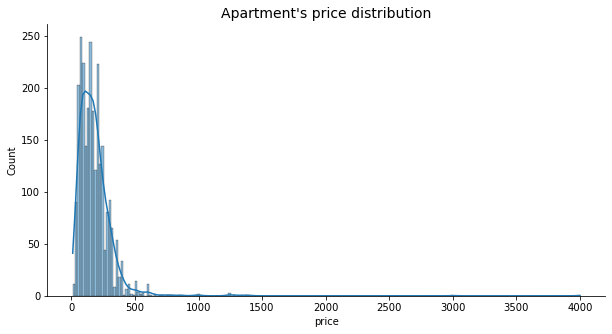

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.histplot(data=listings_apt, x='price', ax=ax, kde=True)
g.set_title('Apartment\'s price distribution', fontsize=14)
sns.despine()

In [28]:
# Given the outliers above, use the MAD() instead of Deviation Standard to remove them
# find the price 3 MAD (Deviation Standards) above the median in this case
max_price = np.median(listings_apt['price']) + (np.median(np.abs(listings_apt['price'] - np.median(listings_apt['price']))) * 3)

max_price


357.0

In [29]:
# Remove outliers
listings_apt = listings_apt.query('price <= @max_price')

In [30]:
# lest see the monthly occupancy of apartments
monthly_occupancy = calendar_apt.groupby([pd.Grouper(key='date', freq='1M'), 'available'])\
    .agg({'listing_id':'count'}).unstack().fillna(0).reset_index()

monthly_occupancy.columns = ['date'] + ['busy' if c[1]=='f' else 'available' for c in monthly_occupancy.columns[1:]]

monthly_occupancy['total'] = monthly_occupancy['busy'] + monthly_occupancy['available']

monthly_occupancy['% busy'] = (monthly_occupancy['busy'] / monthly_occupancy['total'])

monthly_occupancy.head()

,date,busy,available,total,% busy
0,2016-09-30,47652,17673,65325,0.73
1,2016-10-31,47771,33232,81003,0.59
2,2016-11-30,35988,42402,78390,0.46
3,2016-12-31,37278,43725,81003,0.46
4,2017-01-31,36206,44797,81003,0.45


In [31]:
# lest see how prices vary during the year for all Apartment's listings
monthly_price = calendar_apt.groupby([pd.Grouper(key='date', freq='1M')]).agg({'price':'mean'}).reset_index()
monthly_price.columns = ['date', 'price']

monthly_price.head()


,date,price
0,2016-09-30,77.34
1,2016-10-31,106.93
2,2016-11-30,120.16
3,2016-12-31,111.42
4,2017-01-31,107.54


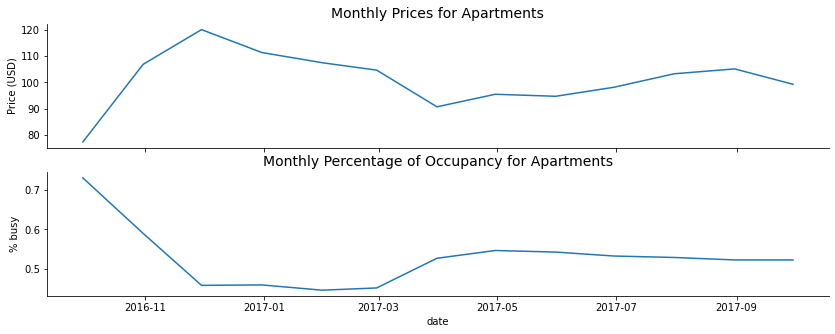

In [32]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14, 5), sharex=True, sharey=False)

g = sns.lineplot(data=monthly_price, x='date', y='price', ax=ax1)
g1 = sns.lineplot(data=monthly_occupancy, x='date', y='% busy', ax=ax2)

_ = g.set_title('Monthly Prices for Apartments', fontsize=14)
_ = g1.set_title('Monthly Percentage of Occupancy for Apartments', fontsize=14)
_ = g.set_ylabel('Price (USD)')

sns.despine()

### 2. What other factors may impact the selection of an apartment beisdes de price? 


In [33]:
# identify the occupancy rate for each listing
apt_avl = calendar_apt.groupby(['listing_id','available']).agg({'date':lambda s: s.shape[0]}).unstack().fillna(0).reset_index()
apt_avl.columns = ['listing_id'] + ['busy' if c[1]=='f' else 'available' for c in apt_avl.columns[1:] ]
apt_avl['% busy'] = apt_avl['busy'] / (apt_avl['busy'] + apt_avl['available'])
apt_avl.head()

,listing_id,busy,available,% busy
0,3353,116.00,249.00,0.32
1,6695,41.00,324.00,0.11
2,6976,46.00,319.00,0.13
3,8792,117.00,248.00,0.32
4,9273,1.00,364.00,0.00


In [34]:
# average price of apartments busy less than 25% of the time and more than 75% of the time

buckets = [0., .25, .50, .75, 1.]
listings_busy_x = []
for i in range(len(buckets)-1):
    listings_busy_x.append(list(apt_avl.query("`% busy` > @buckets[@i] and `% busy` <= @buckets[@i+1]")['listing_id']))


In [35]:
prices = []
for l in listings_busy_x:
    p = listings_apt.query("id == @l")['price']
    prices.append(p[(p<p.quantile(.80))].mean())
prices

[132.10248901903367, 121.36875, 161.1904761904762, 116.41168996188055]

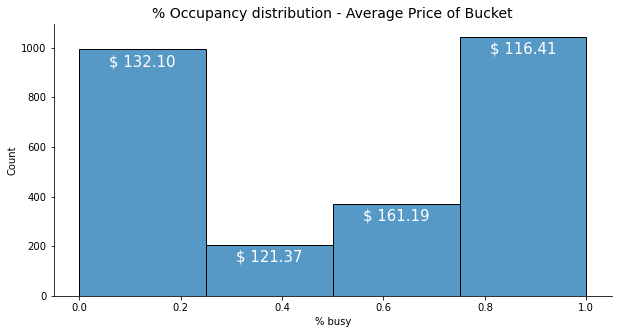

In [36]:
# Plot a histogram of the percentages of occupancy, use a bucket size of 25%
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.histplot(data=apt_avl, x='% busy', binwidth=.25, ax=ax)
g.set_title('% Occupancy distribution - Average Price of Bucket', fontsize=14);

for p,text in zip(g.patches, prices):
    g.annotate(f'$ {text:,.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points',
                   color='white')

sns.despine()

You can see there are two peaks, the first one shows listings busy less than 25% of the time, and the second peak shows listings busy more that 75% of the time.
Also the you can see clearly that the more busy apartments have a lower price in average.

### 3. Do the physical location of the property has an impact on the occupancy of the property?

Les't see if the physical location beside could be also a factor that affects occupancy

In [37]:
# Mark each listing with a group type according to its occupancy
apt_avl['group'] = 0

apt_avl.at[apt_avl['% busy']<=.25, 'group'] = 1
apt_avl.at[(apt_avl['% busy']>.25) & (apt_avl['% busy']<=.5), 'group'] = 2
apt_avl.at[(apt_avl['% busy']>.5) & (apt_avl['% busy']<=.75), 'group'] = 3
apt_avl.at[apt_avl['% busy']>.75, 'group'] = 4

apt_avl['group'].value_counts()




4    1043
1     993
3     370
2     206
Name: group, dtype: int64

In [38]:
# Include the latitude and longitude to show the points in a map
apt_avl = apt_avl.merge(listings[['id', 'longitude', 'latitude']], left_on='listing_id',
    right_on='id', how='left')

# drop id column
apt_avl.drop(columns=['id'], inplace=True)

apt_avl.head()

,listing_id,busy,available,% busy,group,longitude,latitude
0,3353,116.00,249.00,0.32,2,-71.13,42.36
1,6695,41.00,324.00,0.11,1,-71.09,42.33
2,6976,46.00,319.00,0.13,1,-71.14,42.29
3,8792,117.00,248.00,0.32,2,-71.06,42.36
4,9273,1.00,364.00,0.00,1,-71.03,42.36


In [39]:
import folium

In [40]:
f = folium.Figure(width=500, height=500)

my_map=folium.Map(location = [42.320,-71.05], #Initiate map on Boston city
                  zoom_start = 11,
                  min_zoom = 11
).add_to(f)

In [41]:
for i, r in apt_avl.iterrows():
    if r['group'] == 1:
        color = 'red'
    elif r['group'] == 2:
        color = 'orange'
    elif r['group'] == 3:
        color = 'blue'
    else:
        color = 'green'

    folium.Circle(
        [r['latitude'], r['longitude'] ],
        fill=True,
        radius=2,
        color=color,
        
        ).add_to(my_map)     

In [42]:
# show location of listings
# green means apartments with an occupancy rate of more than 75%
# red means apartments with an occupancy rate of less than 25%
# orange and blue means apartments with an occupancy rate between 25% and 50%, and between 50% and 75%
my_map

It can be seen there are no well defined clusters of listings of each color.


### 4. Model a price predictor based on some features of the listings

In [43]:
# columns that will be used for prediction, target variable is price
columns = [
    'id',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'bed_type',
    'amenities',
    'guests_included',
    'minimum_nights',
    'price',
]

In [44]:
listings_apt = listings_apt[columns]

In [45]:
listings_apt.head()

,id,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,minimum_nights,price
1,3075044,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",0,2,65.00
2,6976,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",1,3,65.00
6,5706985,Entire home/apt,3,1.00,1.00,2.00,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1,1,100.00
9,849408,Entire home/apt,5,1.00,2.00,2.00,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,4,229.00
13,13547301,Entire home/apt,5,1.00,2.00,3.00,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",5,2,150.00


In [46]:
listings_apt.dtypes

id                   int64
room_type           object
accommodates         int64
bathrooms          float64
bedrooms           float64
beds               float64
bed_type            object
amenities           object
guests_included      int64
minimum_nights       int64
price              float64
dtype: object

In [47]:
# Work on categorical variables
listings_apt.select_dtypes(include=['object']).head()


,room_type,bed_type,amenities
1,Private room,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio..."
2,Private room,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit..."
6,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
9,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
13,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio..."


In [48]:
# identify categorical columns
catcols = listings_apt.select_dtypes(include=['object']).copy()
# remove amenities
catcols.drop('amenities', axis='columns', inplace=True)

catcols.head()

,room_type,bed_type
1,Private room,Real Bed
2,Private room,Real Bed
6,Entire home/apt,Real Bed
9,Entire home/apt,Real Bed
13,Entire home/apt,Real Bed


In [49]:
catcols_name = catcols.columns
for col in catcols_name:
    catcols = pd.concat([catcols.drop(col, axis=1), pd.get_dummies(
        catcols[col],
        prefix=col,
        prefix_sep='_',
        drop_first=True,
        dummy_na=False
    )], axis=1)

In [50]:
catcols.head()

,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
1,1,0,0,0,0,1
2,1,0,0,0,0,1
6,0,0,0,0,0,1
9,0,0,0,0,0,1
13,0,0,0,0,0,1


In [51]:
# remove categorical columns from listings_apt and add new dummy columns
listings_apt.drop(catcols_name, axis='columns', inplace=True)
listings_apt = pd.concat([listings_apt, catcols], axis='columns')

In [52]:
listings_apt.head()

,id,accommodates,bathrooms,bedrooms,beds,amenities,guests_included,minimum_nights,price,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
1,3075044,2,1.00,1.00,1.00,"{TV,Internet,""Wireless Internet"",""Air Conditio...",0,2,65.00,1,0,0,0,0,1
2,6976,2,1.00,1.00,1.00,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",1,3,65.00,1,0,0,0,0,1
6,5706985,3,1.00,1.00,2.00,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1,1,100.00,0,0,0,0,0,1
9,849408,5,1.00,2.00,2.00,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,4,229.00,0,0,0,0,0,1
13,13547301,5,1.00,2.00,3.00,"{TV,Internet,""Wireless Internet"",""Air Conditio...",5,2,150.00,0,0,0,0,0,1


In [53]:
# extract amenities and convert to dummy columns
amenities = listings_apt[['amenities']].copy()
amenities.head()

,amenities
1,"{TV,Internet,""Wireless Internet"",""Air Conditio..."
2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit..."
6,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
9,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
13,"{TV,Internet,""Wireless Internet"",""Air Conditio..."


In [54]:
for i, r in tqdm(amenities.iterrows(), total=amenities.shape[0]):
    a = r['amenities'].split(',')
    for item in a:
        item = item.replace('"', '').replace("{","").replace("}","")
        if item not in amenities.columns:
            amenities[item] = None
            amenities.at[i, item] = 1
        else:
            amenities.at[i, item] = 1

    

100%|██████████| 2469/2469 [00:00<00:00, 3313.02it/s]


In [55]:
amenities.head()

,amenities,TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Pets Allowed,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Fire Extinguisher,Essentials,Shampoo,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Cable TV,Free Parking on Premises,First Aid Kit,Safety Card,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,24-Hour Check-in,Laptop Friendly Workspace,Breakfast,Cat(s),Indoor Fireplace,Washer / Dryer,Smoking Allowed,,Buzzer/Wireless Intercom,Hot Tub,Suitable for Events,Wheelchair Accessible,Gym,Elevator in Building,Pool,Doorman,Paid Parking Off Premises,Free Parking on Street,Other pet(s)
1,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",1,None,1,1,1,None,None,None,1,None,1,1,1,1,None,1,1,1,None,None,None,1,1,1,1,1,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1,1,1,None,1,None,None,None,1,None,None,None,1,1,1,1,1,None,None,None,None,None,1,1,None,None,None,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1,1,1,1,None,None,None,1,1,1,1,1,1,1,1,1,None,1,1,1,1,1,1,None,None,None,1,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
13,"{TV,Internet,""Wireless Internet"",""Air Conditio...",1,1,1,1,1,None,None,None,1,1,None,None,1,1,1,1,1,None,1,1,1,None,1,1,1,None,None,1,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [56]:
amenities.drop('amenities', axis='columns', inplace=True)

In [57]:
# fillna amenities dummy columns
for c in amenities.columns:
    amenities[c].fillna(0, inplace=True)

amenities.head(2)

,TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Pets Allowed,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Fire Extinguisher,Essentials,Shampoo,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Cable TV,Free Parking on Premises,First Aid Kit,Safety Card,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,24-Hour Check-in,Laptop Friendly Workspace,Breakfast,Cat(s),Indoor Fireplace,Washer / Dryer,Smoking Allowed,,Buzzer/Wireless Intercom,Hot Tub,Suitable for Events,Wheelchair Accessible,Gym,Elevator in Building,Pool,Doorman,Paid Parking Off Premises,Free Parking on Street,Other pet(s)
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,0,0,0,1,0,1,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
# remove uncommon amenities
avg_amenities = amenities.sum(axis='rows').mean()
amenities = amenities.iloc[:, (amenities.sum(axis='rows')>avg_amenities).values]
amenities.head()

,TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Fire Extinguisher,Essentials,Shampoo,Hangers,Hair Dryer,Iron,Cable TV,24-Hour Check-in,Laptop Friendly Workspace
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0
6,1,1,1,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1


In [59]:
# drop amenties column from listings_apt and add dummy columns
listings_apt.drop('amenities', axis='columns', inplace=True)
listings_apt = pd.concat([listings_apt, amenities], axis='columns')
listings_apt.head()

,id,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,price,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Fire Extinguisher,Essentials,Shampoo,Hangers,Hair Dryer,Iron,Cable TV,24-Hour Check-in,Laptop Friendly Workspace
1,3075044,2,1.00,1.00,1.00,0,2,65.00,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,6976,2,1.00,1.00,1.00,1,3,65.00,1,0,0,0,0,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0
6,5706985,3,1.00,1.00,2.00,1,1,100.00,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0
9,849408,5,1.00,2.00,2.00,4,4,229.00,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13,13547301,5,1.00,2.00,3.00,5,2,150.00,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1


In [60]:
listings_apt.dtypes

id                             int64
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
guests_included                int64
minimum_nights                 int64
price                        float64
room_type_Private room         uint8
room_type_Shared room          uint8
bed_type_Couch                 uint8
bed_type_Futon                 uint8
bed_type_Pull-out Sofa         uint8
bed_type_Real Bed              uint8
TV                             int64
Internet                       int64
Wireless Internet              int64
Air Conditioning               int64
Kitchen                        int64
Heating                        int64
Family/Kid Friendly            int64
Washer                         int64
Dryer                          int64
Smoke Detector                 int64
Carbon Monoxide Detector       int64
Fire Extinguisher              int64
Essentials                     int64
S

### Is it possible to predict the price of a listing based on its features, like number of rooms, beds, bathrooms, etc.?

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [62]:
# Remove features that are not important according to f_regression, se below
no_features = [
    'Carbon Monoxide Detector',
    'Wireless Internet',
    'bed_type_Couch',
    'Fire Extinguisher',
    'minimum_nights',
    'Hangers',
    'Smoke Detector',
    'Laptop Friendly Workspace',
    # -------------
    'Iron',
    'Shampoo',
    ]


listings_apt.drop(no_features, axis='columns', inplace=True)

In [63]:
listings_apt.head(2)

,id,accommodates,bathrooms,bedrooms,beds,guests_included,price,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,TV,Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,Essentials,Hair Dryer,Cable TV,24-Hour Check-in
1,3075044,2,1.00,1.00,1.00,0,65.00,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0
2,6976,2,1.00,1.00,1.00,1,65.00,1,0,0,0,1,1,0,1,1,1,0,1,1,1,0,1,0


In [64]:
x = listings_apt
y = listings_apt['price']

x = x.drop(['id', 'price'], axis='columns')


In [65]:
# Divide data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=42)

In [66]:
# create a linear regression model
lm_model = LinearRegression(normalize=True)

In [67]:
# train model
lm_model.fit(x_train, y_train)

LinearRegression(normalize=True)

In [68]:
# predict
y_test_pred = lm_model.predict(x_test)

In [69]:
r2_score(y_test, y_test_pred)

0.5615531269346594

In [70]:
from sklearn.feature_selection import f_regression

In [71]:
f_stat, p_vals = f_regression(x_train, y_train)

In [72]:
p_vals.round(3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [73]:
x.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed', 'TV', 'Internet',
       'Air Conditioning', 'Kitchen', 'Heating', 'Family/Kid Friendly',
       'Washer', 'Dryer', 'Essentials', 'Hair Dryer', 'Cable TV',
       '24-Hour Check-in'],
      dtype='object')

In [74]:
reg_summary = pd.DataFrame(data=x.columns.values, columns=['features'])
# reg_summary

In [75]:
reg_summary['coefficients'] = lm_model.coef_

In [76]:
reg_summary['p_values'] = p_vals.round(3)

In [103]:
reg_summary.sort_values('p_values', ascending=False).style.format({'p_values':"{:.3f}", 'coefficients':'{:.2f}'})

,features,coefficients,p_values
0,accommodates,5.00,0.000
1,bathrooms,7.95,0.000
20,Cable TV,16.67,0.000
19,Hair Dryer,0.96,0.000
18,Essentials,1.28,0.000
17,Dryer,4.26,0.000
16,Washer,10.56,0.000
15,Family/Kid Friendly,2.78,0.000
14,Heating,-3.52,0.000
13,Kitchen,-17.95,0.000


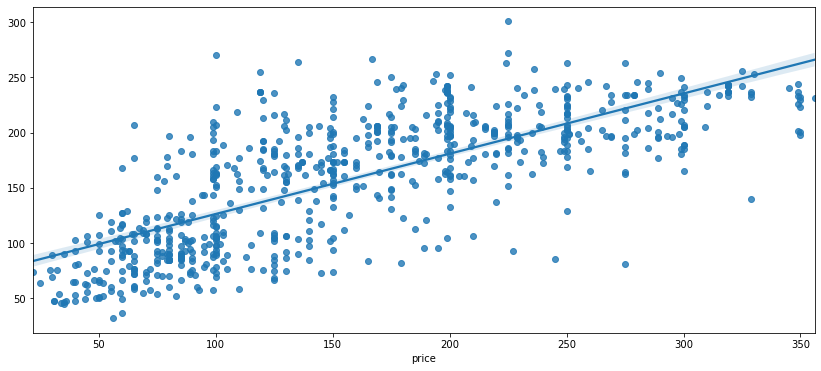

In [78]:
fig, ax = plt.subplots(figsize=(14, 6))
g = sns.regplot(x=y_test, y=y_test_pred, ax=ax)

In [79]:
residuals = y_test - y_test_pred

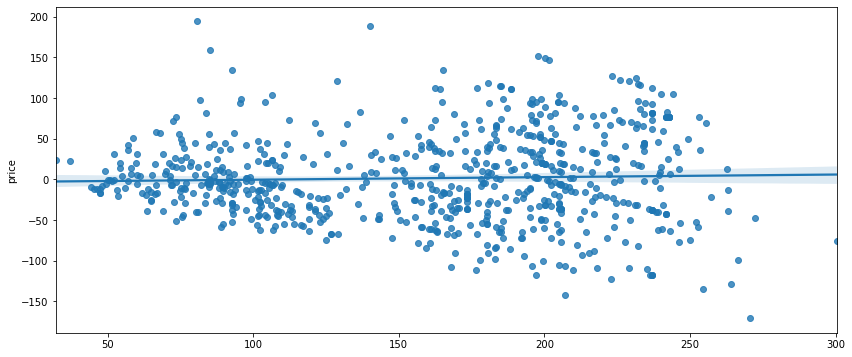

In [80]:
fig, ax = plt.subplots(figsize=(14, 6))
g = sns.regplot(x=y_test_pred, y=residuals, ax=ax)

In [81]:
import statsmodels.api as sm

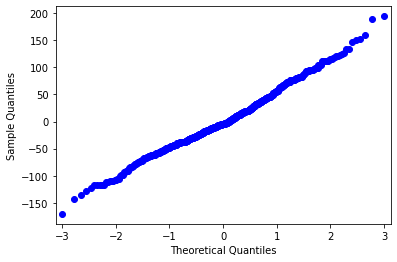

In [82]:
sm.qqplot(residuals);

In [98]:
for yt, yp in zip(y_test[:15], y_test_pred[:15]):
    print(f'y test: {yt:03.2f} => y prediction: {yp:.2f}')

y test: 100.00 => y prediction: 88.75
y test: 250.00 => y prediction: 232.26
y test: 142.00 => y prediction: 148.45
y test: 150.00 => y prediction: 154.26
y test: 275.00 => y prediction: 195.45
y test: 238.00 => y prediction: 224.66
y test: 300.00 => y prediction: 206.60
y test: 129.00 => y prediction: 147.61
y test: 75.00 => y prediction: 84.71
y test: 65.00 => y prediction: 176.55
y test: 103.00 => y prediction: 84.18
y test: 125.00 => y prediction: 215.51
y test: 106.00 => y prediction: 135.89
y test: 199.00 => y prediction: 236.98
y test: 75.00 => y prediction: 102.43
